In [5]:
import json
import matplotlib.pyplot as plt
from keras.models import load_model

In [6]:
modelSeq = load_model('modelSeq.hdf5')
modelFF = load_model('modelFF.hdf5')
modelRNN = load_model('modelRNN.hdf5')
modelCNN = load_model('modelCNN.hdf5')
modelCNNsep = load_model('modelCNNsep.hdf5')

In [7]:
print("Count parameters: ")
print("FF = ", modelFF.count_params())
print("RNN = ", modelRNN.count_params())
print("CNN = ", modelCNN.count_params())
print("CNNsep = ", modelCNNsep.count_params())
print("Sequential = ", modelSeq.count_params())

Count parameters: 
FF =  221066
RNN =  136
CNN =  132362
CNNsep =  116050
Sequential =  6010


In [8]:
with open('historyFF.json', 'r') as f:
    data = f.read()
    historyFF = json.loads(data)
    
with open('historyRNN.json', 'r') as f:
    data = f.read()
    historyRNN = json.loads(data)
    
with open('historyCNN.json', 'r') as f:
    data = f.read()
    historyCNN = json.loads(data)
    
with open('historyCNNsep.json', 'r') as f:
    data = f.read()
    historyCNNsep = json.loads(data)
    
with open('historySeq.json', 'r') as f:
    data = f.read()
    historySeq = json.loads(data)

In [9]:
print("Accuracy: ")
print("FF = ", max(historyFF['accuracy'])*100)
print("RNN = ", max(historyRNN['accuracy'])*100)
print("CNN = ", max(historyCNN['accuracy'])*100)
print("CNNsep = ", max(historyCNNsep['accuracy'])*100)
print("Sequential = ", max(historySeq['accuracy'])*100)

Accuracy: 
FF =  99.16918277740479
RNN =  98.95778298377991
CNN =  96.7064917087555
CNNsep =  99.16977286338806
Sequential =  99.37624335289001


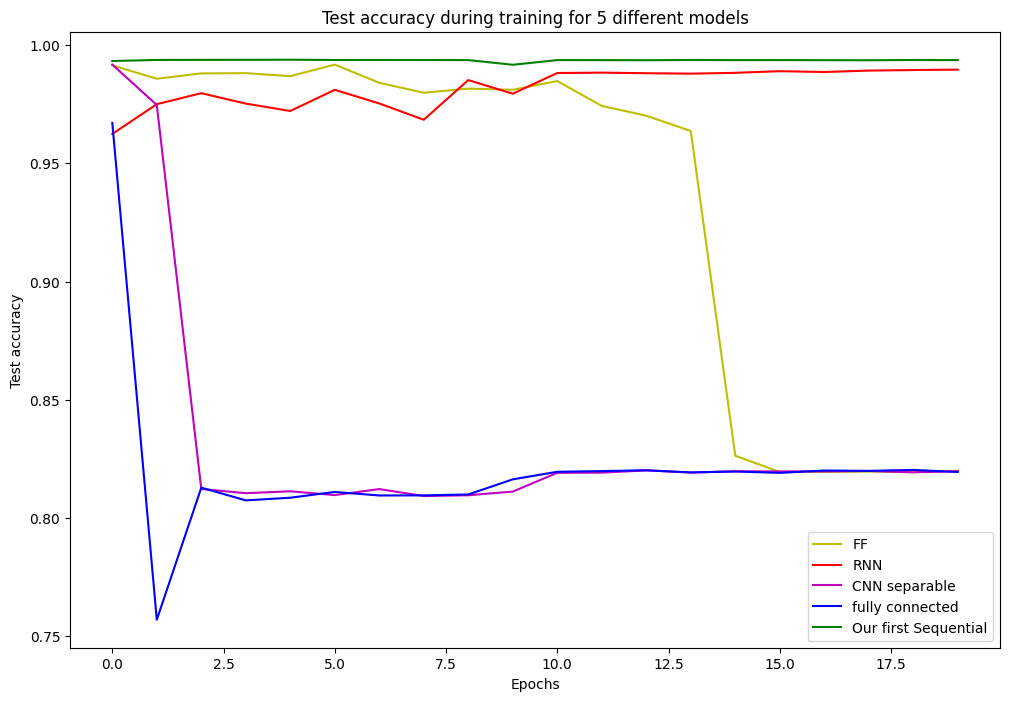

In [10]:
plt.figure(figsize=(12,8))

plt.plot(historyFF['accuracy'], 'y', label = 'FF')
plt.plot(historyRNN['accuracy'], 'r', label = 'RNN')
plt.plot(historyCNNsep['accuracy'], 'm', label = 'CNN separable')
plt.plot(historyCNN['accuracy'], 'b', label = 'fully connected')
plt.plot(historySeq['accuracy'], 'g', label = 'Our first Sequential')

plt.title('Test accuracy during training for 5 different models')
plt.xlabel('Epochs')
plt.ylabel('Test accuracy')
plt.legend()

plt.show

plt.savefig('Accuracy.png')